In [15]:
import pandas as pd
import seaborn as sns
from datetime import date

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [16]:
df = pd.read_csv('/Users/LV/Desktop/cleaned_bol_data.csv')

/Users/LV/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (6,7,12,13,15,19) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [17]:
df.head()

,orderDate,productId,sellerId,totalPrice,quantityOrdered,countryCode,cancellationDate,cancellationReasonCode,promisedDeliveryDate,shipmentDate,...,detailedMatchClassification,generalMatchClassification,orderYear,orderMonth,orderWeekday,partnerSellingMonths,promisedDeliveryDays,orderCorona,orderWeekend,determinantClassification
0,2019-01-30,9200000076286694,1047501,13.39,1,NL,NaN,NaN,2019-02-01,2019-01-31,...,KNOWN HAPPY,KNOWN HAPPY,2019,1,4,44,2.0,0,0,All good
1,2019-01-30,9200000081287727,1288355,15.00,1,NL,NaN,NaN,2019-02-06,2019-01-31,...,KNOWN HAPPY,KNOWN HAPPY,2019,1,4,18,7.0,0,0,All good
2,2019-01-21,9200000091242934,1388168,12.95,1,NL,NaN,NaN,2019-01-23,2019-01-21,...,KNOWN HAPPY,KNOWN HAPPY,2019,1,2,4,2.0,0,0,All good
3,2019-07-15,9200000110865285,659720,19.95,1,NL,NaN,NaN,2019-07-18,2019-07-15,...,KNOWN HAPPY,KNOWN HAPPY,2019,7,2,84,3.0,0,0,All good
4,2019-05-12,9200000093094256,1244284,11.50,1,NL,NaN,NaN,2019-05-15,2019-05-14,...,KNOWN HAPPY,KNOWN HAPPY,2019,5,1,29,3.0,0,0,All good


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4773889 entries, 0 to 4773888
Data columns (total 46 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   orderDate                         object 
 1   productId                         int64  
 2   sellerId                          int64  
 3   totalPrice                        float64
 4   quantityOrdered                   int64  
 5   countryCode                       object 
 6   cancellationDate                  object 
 7   cancellationReasonCode            object 
 8   promisedDeliveryDate              object 
 9   shipmentDate                      object 
 10  transporterCode                   object 
 11  transporterName                   object 
 12  transporterNameOther              object 
 13  dateTimeFirstDeliveryMoment       object 
 14  fulfilmentType                    object 
 15  startDateCase                     object 
 16  cntDistinctCaseIds                fl

In [19]:
#Change type of columns
dtype = {'calculationDefinitive': bool,
         'noCancellation': bool,
         'noCase': bool,
         'hasOneCase': bool,
         'hasMoreCases': bool,
         'noReturn': bool,
         'orderWeekend': bool,
         'orderCorona': bool}

df = df.astype(dtype)

#Transform dates to date-type
df['orderDate'] = pd.to_datetime(df['orderDate'])
df['cancellationDate'] = pd.to_datetime(df['cancellationDate'])
df['promisedDeliveryDate'] = pd.to_datetime(df['promisedDeliveryDate'])
df['shipmentDate'] = pd.to_datetime(df['shipmentDate'])
df['dateTimeFirstDeliveryMoment'] = pd.to_datetime(df['dateTimeFirstDeliveryMoment'])
df['startDateCase'] = pd.to_datetime(df['startDateCase'])
df['returnDateTime'] = pd.to_datetime(df['returnDateTime'])
df['registrationDateSeller'] = pd.to_datetime(df['registrationDateSeller'])

df.dtypes

orderDate                           datetime64[ns]
productId                                    int64
sellerId                                     int64
totalPrice                                 float64
quantityOrdered                              int64
countryCode                                 object
cancellationDate                    datetime64[ns]
cancellationReasonCode                      object
promisedDeliveryDate                datetime64[ns]
shipmentDate                        datetime64[ns]
transporterCode                             object
transporterName                             object
transporterNameOther                        object
dateTimeFirstDeliveryMoment         datetime64[ns]
fulfilmentType                              object
startDateCase                       datetime64[ns]
cntDistinctCaseIds                         float64
returnDateTime                      datetime64[ns]
quanityReturned                            float64
returnCode                     

In [21]:
#Create new variables related to periods (days difference)
df['caseDays'] = (df['startDateCase'] - df['orderDate']).dt.days
df['returnDays'] = (df['returnDateTime'] - df['orderDate']).dt.days
df['cancellationDays'] = (df['cancellationDate'] - df['orderDate']).dt.days
df['actualDeliveryDays'] = (df['dateTimeFirstDeliveryMoment'].dt.normalize() - df['orderDate']).dt.days
df['shipmentDays'] = (df['shipmentDate'] - df['orderDate']).dt.days

In [8]:
df.describe(include = 'all', datetime_is_numeric = True)

,orderDate,productId,sellerId,totalPrice,quantityOrdered,countryCode,cancellationDate,cancellationReasonCode,promisedDeliveryDate,shipmentDate,...,generalMatchClassification,detailedMatchClassification,casePeriod,returnPeriod,cancelPeriod,promisedDeliveryPeriod,deliveryPeriod,year,month,weekday
count,4773889,4.773889e+06,4.773889e+06,4.773889e+06,4.773889e+06,4773889,77862,77862,4772950,4696047,...,4773889,4773889,164395.000000,288802.000000,77862.000000,4.772950e+06,3.068341e+06,4.773889e+06,4.773889e+06,4.773889e+06
unique,NaN,NaN,NaN,NaN,NaN,2,NaN,25,NaN,NaN,...,5,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NL,NaN,CUST_FE,NaN,NaN,...,KNOWN HAPPY,KNOWN HAPPY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,3554802,NaN,51025,NaN,NaN,...,2685606,2685606,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2020-02-19 20:40:58.096760576,8.893234e+15,1.079660e+06,3.317443e+01,1.110490e+00,NaN,2020-02-21 03:24:09.487611648,NaN,2020-02-22 12:28:54.060680960,2020-02-20 14:13:23.186797824,...,NaN,NaN,6.362420,8.246858,1.793712,2.645849e+00,1.979147e+00,2.019596e+03,7.011754e+00,2.817510e+00
min,2019-01-01 00:00:00,6.667439e+08,2.821000e+03,6.900000e-01,1.000000e+00,NaN,2019-01-01 00:00:00,NaN,2019-01-02 00:00:00,2019-01-01 00:00:00,...,NaN,NaN,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,2.019000e+03,1.000000e+00,0.000000e+00
25%,2019-09-13 00:00:00,9.200000e+15,8.299310e+05,1.295000e+01,1.000000e+00,NaN,2019-09-26 00:00:00,NaN,2019-09-17 00:00:00,2019-09-14 00:00:00,...,NaN,NaN,2.000000,2.000000,0.000000,1.000000e+00,1.000000e+00,2.019000e+03,4.000000e+00,1.000000e+00
50%,2020-03-18 00:00:00,9.200000e+15,1.121998e+06,1.900000e+01,1.000000e+00,NaN,2020-03-23 00:00:00,NaN,2020-03-20 00:00:00,2020-03-19 00:00:00,...,NaN,NaN,4.000000,5.000000,1.000000,2.000000e+00,2.000000e+00,2.020000e+03,7.000000e+00,3.000000e+00
75%,2020-08-14 00:00:00,9.200000e+15,1.279589e+06,3.145000e+01,1.000000e+00,NaN,2020-08-01 00:00:00,NaN,2020-08-18 00:00:00,2020-08-16 00:00:00,...,NaN,NaN,8.000000,9.000000,2.000000,3.000000e+00,2.000000e+00,2.020000e+03,1.000000e+01,5.000000e+00
max,2020-12-16 00:00:00,9.300000e+15,1.653288e+06,1.063720e+04,3.000000e+02,NaN,2021-01-11 00:00:00,NaN,2021-01-06 00:00:00,2021-01-09 00:00:00,...,NaN,NaN,29.000000,672.000000,479.000000,4.900000e+01,1.990000e+02,2.020000e+03,1.200000e+01,6.000000e+00


#### Create determinant availability plot

In [22]:
#Calculate totals per Match Determinant
totalCase = df['caseDays'].count()
totalReturn = df['returnDays'].count()
totalCancel = df['cancellationDays'].count()
totalPromisedDelivery = df['promisedDeliveryDays'].count()
totalDelivery = df['actualDeliveryDays'].count()

In [23]:
#Create table for plot
periodTable = pd.concat([df['caseDays'].value_counts().sort_index(),
                         df['returnDays'].value_counts().sort_index(),
                         df['cancellationDays'].value_counts().sort_index(),
                         df['promisedDeliveryDays'].value_counts().sort_index(),
                         df['actualDeliveryDays'].value_counts().sort_index()],axis=1)

In [24]:
#Create percantages per day and calculate running sum
periodTable['caseDays%'] = (periodTable['caseDays'] / totalCase).cumsum()
periodTable['returnDays%'] = (periodTable['returnDays'] / totalReturn).cumsum()
periodTable['cancellationDays%'] = (periodTable['cancellationDays'] / totalCancel).cumsum()
periodTable['promisedDeliveryDays%'] = (periodTable['promisedDeliveryDays'] / totalPromisedDelivery).cumsum()
periodTable['actualDeliveryDays%'] = (periodTable['actualDeliveryDays'] / df.shape[0]).cumsum()

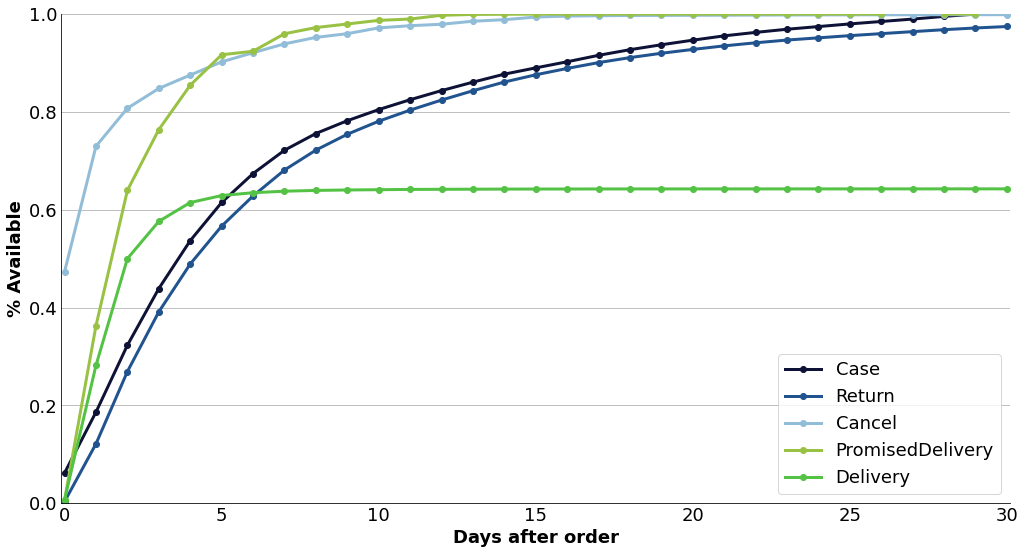

In [25]:
### Plot parameters
plt.rcParams.update({'font.size': 18})

# Turn interactive plotting off
plt.ioff()

# Color palettes
color1 = ['#364958','#3b6064','#55828b','#87bba2','#c9e4ca']
color2 = ['#051923','#003554','#006494','#0582ca','#00a6fb']
color3 = ['#fb8500','#ffb703','#023047','#219ebc','#8ecae6']
color4 = ['#0e1236','#21538e','#92bdd8','#99c244','#54c244']
COLOR = color4

### Plotten
plt.figure(figsize = (17,9))

plt.plot(periodTable['caseDays%'], color=COLOR[0], marker = 'o', linewidth=3)
plt.plot(periodTable['returnDays%'], color=COLOR[1], marker = 'o', linewidth=3)
plt.plot(periodTable['cancellationDays%'], color=COLOR[2], marker = 'o', linewidth=3)
plt.plot(periodTable['promisedDeliveryDays%'], color=COLOR[3], marker = 'o', linewidth=3)
plt.plot(periodTable['actualDeliveryDays%'], color=COLOR[4], marker = 'o', linewidth=3)

### Titel
plt.title('', fontweight = 'bold')

### Assen
plt.ylabel('% Available', fontweight = 'bold')
plt.ylim(0,1.0)

plt.xlabel('Days after order', fontweight = 'bold')
plt.xlim(-0.1, 30.1)
#plt.xticks(x,('tick_1', 'tick_2', 'tick_3', 'tick_4'))

#plt.axvline(x=5, color='red')

### Grafiek Lay-out
plt.grid(color='#C0C0C0', linestyle='-', linewidth=1, axis = 'y')
plt.legend(('Case', 'Return', 'Cancel', 'PromisedDelivery', 'Delivery'),loc='lower right')
plt.tick_params(direction='out', length=0, colors='black')
sns.despine(left=False, bottom=False, right=True)

#plt.savefig('plot.png',dpi = 300)
plt.show()

#### Create dynamic columns

In [26]:
def createColumns(df,X):
    """
    Function to create dynamic columns based on the prediction period.
    X = number of days after order date
    """
    
    dynamic_cols = ['caseDays','returnDays','cancellationDays','actualDeliveryDays']
    
    for col in dynamic_cols:
        
        dynamic_colname = col+'_'+str(X)
        df[dynamic_colname] = df[col].dt.days
        df[dynamic_colname] = df[dynamic_colname].apply(lambda x: x if x <= X else None)
        
    return df

#### Handling categorical variables

In [27]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [28]:
#Categorical variables
s = (df.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)

Categorical variables:
['countryCode', 'cancellationReasonCode', 'transporterCode', 'transporterName', 'transporterNameOther', 'fulfilmentType', 'returnCode', 'productTitle', 'brickName', 'chunkName', 'productGroup', 'productSubGroup', 'productSubSubGroup', 'countryOriginSeller', 'currentCountryAvailabilitySeller', 'detailedMatchClassification', 'generalMatchClassification', 'determinantClassification']


In [34]:
#Option 1: LabelEncoder
#give each category a numerical value - cannot handle nulls - usefull for normalization
le = LabelEncoder()
le.fit(df['fulfilmentType'])
df['fulfilmentType_'] = le.transform(df['fulfilmentType'])

le2 = LabelEncoder()
le2.fit(df['countryCode'])
df['countryCode_'] = le2.transform(df['countryCode'])

In [ ]:
#Option 2: One-Hot-Encoder
#create a boolean column for each separate category - not usefull high cardinality 
ohe = OneHotEncoder(handle_unknown = 'ignore')
enc.fit()
enc.transform()

#### Models
Sklearn multi-class / multi-label: https://scikit-learn.org/stable/modules/multiclass.html

Time-Series Split:
TRAIN: [0] TEST: [1]
TRAIN: [0 1] TEST: [2]
TRAIN: [0 1 2] TEST: [3]
TRAIN: [0 1 2 3] TEST: [4]
TRAIN: [0 1 2 3 4] TEST: [5]

Random Split:
TRAIN: [0 2 3 4 5] TEST: [1]
TRAIN: [0 1 3 4 5] TEST: [2]
TRAIN: [0 1 2 4 5] TEST: [3]
TRAIN: [0 1 2 3 5] TEST: [4]
TRAIN: [0 1 2 3 4] TEST: [5]

In [45]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

index = ['orderDate']
X_col = ['totalPrice','quantityOrdered','promisedDeliveryDays','orderWeekday','orderMonth','orderYear','partnerSellingMonths','fulfilmentType_','countryCode_']
y_col = ['generalMatchClassification']

df_test = df[index+X_col+y_col].dropna()
df_test = df_test.sort_values(by = 'orderDate')
df_test = df_test.reset_index(drop = True)

X = df_test[X_col]
y = df_test[y_col]

In [51]:
#TIME-SERIES SPLIT

tscv = TimeSeriesSplit(n_splits = 3)

accuracy = {}
class_report = {}
count = 1

for train_index, test_index in tscv.split(X):

    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    clf = DecisionTreeClassifier(random_state=0,
                                 class_weight='balanced')
    
    clf = clf.fit(X_train,y_train)

    prediction = clf.predict(X_test)
    
    accuracy[count] = metrics.accuracy_score(y_test, prediction)
    class_report[count] = metrics.classification_report(y_test, prediction)
    
    print(count)
    count +=1

1
2
3


In [55]:
for item in class_report.values():
    print(item)

              precision    recall  f1-score   support

 KNOWN HAPPY       0.65      0.63      0.64    648817
     UNHAPPY       0.13      0.20      0.16    148228
     UNKNOWN       0.54      0.47      0.51    396192

    accuracy                           0.52   1193237
   macro avg       0.44      0.43      0.43   1193237
weighted avg       0.55      0.52      0.53   1193237

              precision    recall  f1-score   support

 KNOWN HAPPY       0.70      0.62      0.65    724846
     UNHAPPY       0.13      0.20      0.16    140988
     UNKNOWN       0.46      0.48      0.47    327403

    accuracy                           0.53   1193237
   macro avg       0.43      0.43      0.43   1193237
weighted avg       0.56      0.53      0.54   1193237

              precision    recall  f1-score   support

 KNOWN HAPPY       0.69      0.62      0.65    671427
     UNHAPPY       0.13      0.19      0.15    137896
     UNKNOWN       0.53      0.53      0.53    383914

    accuracy        

In [56]:
#RANDOM KFOLD SPLIT

from sklearn.model_selection import KFold

kf = KFold(n_splits = 3, random_state = 0, shuffle = True)

accuracy_K = {}
class_report_K = {}
count = 1

for train_index, test_index in kf.split(X):

    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    clf = DecisionTreeClassifier(random_state=0,
                                 class_weight='balanced')
    
    clf = clf.fit(X_train,y_train)

    prediction = clf.predict(X_test)
    
    accuracy_K[count] = metrics.accuracy_score(y_test, prediction)
    class_report_K[count] = metrics.classification_report(y_test, prediction)
    
    print(count)
    count +=1

1
2
3


In [57]:
for item in class_report_K.values():
    print(item)

              precision    recall  f1-score   support

 KNOWN HAPPY       0.84      0.75      0.79    895454
     UNHAPPY       0.19      0.28      0.23    189559
     UNKNOWN       0.79      0.81      0.80    505971

    accuracy                           0.71   1590984
   macro avg       0.61      0.61      0.61   1590984
weighted avg       0.75      0.71      0.73   1590984

              precision    recall  f1-score   support

 KNOWN HAPPY       0.84      0.75      0.79    894909
     UNHAPPY       0.19      0.28      0.23    190235
     UNKNOWN       0.79      0.81      0.80    505839

    accuracy                           0.71   1590983
   macro avg       0.61      0.61      0.61   1590983
weighted avg       0.75      0.71      0.73   1590983

              precision    recall  f1-score   support

 KNOWN HAPPY       0.84      0.75      0.79    895243
     UNHAPPY       0.19      0.28      0.23    189902
     UNKNOWN       0.80      0.81      0.80    505838

    accuracy        

In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

clf = DecisionTreeClassifier(random_state=0,
                             class_weight='balanced')

X = ['totalPrice','quantityOrdered','promisedDeliveryDays','orderWeekday','orderMonth','orderWeekend','orderYear','orderCorona','partnerSellingMonths','fulfilmentType_','countryCode_']
y = ['generalMatchClassification']

df_test = df[X+y].dropna()

clf = clf.fit(df_test[X],df_test[y])

prediction = clf.predict(df_test[X])

print("Accuracy:",metrics.accuracy_score(df_test[y], prediction))

Accuracy: 0.8570812600173897


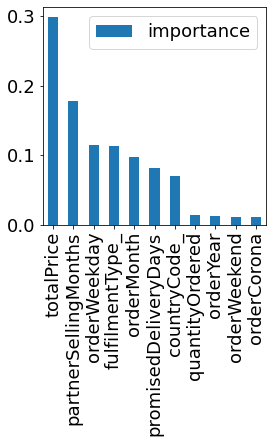

In [36]:
importanceDF = pd.DataFrame(clf.feature_importances_,index=X,columns=['importance']).sort_values('importance',ascending=False)
importanceDF.plot.bar(figsize=(4,4))
plt.show()

In [37]:
print(metrics.classification_report(df_test[y], prediction))

              precision    recall  f1-score   support

 KNOWN HAPPY       0.95      0.85      0.90   2685606
     UNHAPPY       0.50      0.75      0.60    569696
     UNKNOWN       0.91      0.92      0.91   1517648

    accuracy                           0.86   4772950
   macro avg       0.79      0.84      0.80   4772950
weighted avg       0.88      0.86      0.87   4772950

